In [353]:
#importing modules, suppressing warnings, adding libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [354]:
plt.style.use('ggplot')

# Reading The Dataset

In [355]:
application_dataset = pd.read_csv("application_data.csv")
prev_appl_dataset = pd.read_csv("previous_application.csv")

In [356]:
# Reading Application Dataset
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [357]:
# Reading Previous Application Dataset
prev_appl_dataset.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
# Checking information for current application dataset
application_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [359]:
# Checking information for the previous application dataset
prev_appl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [360]:
print(application_dataset.shape)

print(prev_appl_dataset.shape)

(307511, 122)
(1670214, 37)


<b> Observation:</b>

prev_appl_dataset has 37 features and 1670214 rows
(Out of which 15 features are float64, 6 features are integer, 16 features are object datatype)

application_dataset has 121 features, 1 target variable, and 307511 rows
(Out of which 65 features are float64, 41 features are integer, 16 features are object datatype)

In [361]:
# Function_name : missing_data_percentage
# Usage : Returns percent of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing categories having missing values and percentage of missing values in those categories

def missing_data_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [362]:
# Function_name : valuewise_defaulter_percentage
# Usage : Returns percent of defaulters for every unique value of a column(Categorical)
# Arguments : dataframe, column
# Returns : a dataframe containing unique values of a caterory and percent of defaulters

def valuewise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

# Checking Data Imbalance

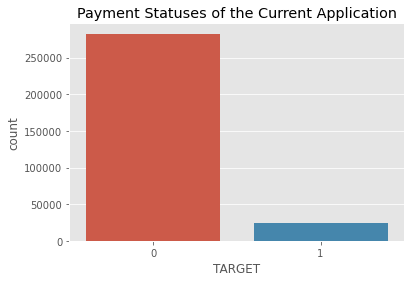

In [478]:
plt.title("Payment Statuses of the Current Application")
sns.countplot(application_dataset['TARGET'])
plt.show()

# Data Imbalance Ratio

In [479]:
non_default  = application_dataset[application_dataset["TARGET"] == 0]
default  = application_dataset[application_dataset["TARGET"] == 1]

print("Number of defaulters: ", default.shape[0])
print("Number of non-defaulters: ", non_default.shape[0])

Number of defaulters:  24825
Number of non-defaulters:  282686


In [480]:
print("Percent of defaulters: ", default.shape[0]*100/(default.shape[0]+non_default.shape[0]))

Percent of defaulters:  8.072881945686495


<b>Comment:</b> This data set is highly imbalanced in nature as the number of defaulter are very less in total population. 


Here is the Data Imbalance Ratio

Defaulter : Non-Defaulter = 8 : 92 = 2 : 23

# Number of Documents Submitted by the Applicants

Here we are trying to analyze all 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4'...'FLAG_DOCUMENT_21' columns. Our goal is to understand whether this trend of document submission can identify any impact on TARGET variable.

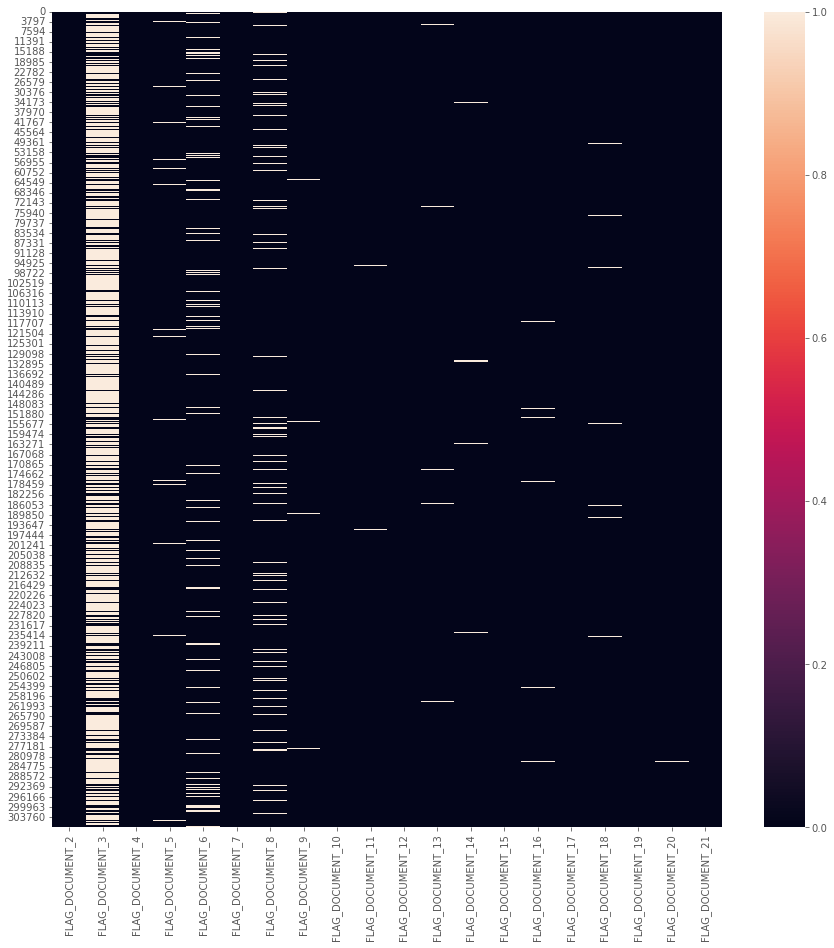

In [505]:
starting_indx = application_dataset.columns.get_loc("FLAG_DOCUMENT_2")
ending_indx = application_dataset.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(15,15))
sns.heatmap(application_dataset.iloc[:,starting_indx:ending_indx])
plt.show()

<b>Comment:</b>

The above heatmap provides an insight that almost all documents were submitted but 'Document 3' was not provided by majority of applicants.
Hence, we can assume that all the document(except document 3) will not help in analyzing the data set. Therefore, all these columns can be dropped.
Also, we are checking defaulter and non-defaulter both the entries in order to identify significance of 'Document 3'

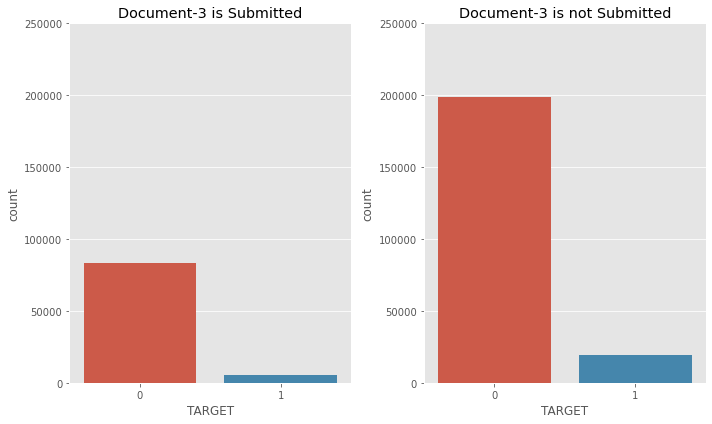

In [504]:
# Using equal ylim for enhanced and better visibilty

fig = plt.figure(figsize=(10,6))

axis1 = fig.add_subplot(1, 2, 1, ylim=(0,250000), title="Document-3 is Submitted")
axis2 = fig.add_subplot(1, 2, 2, ylim=(0,250000), title="Document-3 is not Submitted")

sns.countplot(application_dataset[application_dataset["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=axis1)
sns.countplot(application_dataset[application_dataset["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=axis2)

plt.tight_layout()

plt.show()

<b>Comment:</b>

'FLAG_DOCUMENT_3' is showing very similar trend for both the non-defaulters and defaulters.
Hence, we can drop this column.

# Segment 2 : Applicant Housing Information

In [488]:
starting_index = application_dataset.columns.get_loc("APARTMENTS_AVG") 
ending_index = application_dataset.columns.get_loc("EMERGENCYSTATE_MODE")

In [489]:
housing_df = application_dataset.iloc[:, starting_index:ending_index+1]
housing_df['TARGET'] = application_dataset["TARGET"]
housing_df['NAME_HOUSING_TYPE'] = application_dataset["NAME_HOUSING_TYPE"]

In [490]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   APARTMENTS_AVG                151450 non-null  float64
 1   BASEMENTAREA_AVG              127568 non-null  float64
 2   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 3   YEARS_BUILD_AVG               103023 non-null  float64
 4   COMMONAREA_AVG                92646 non-null   float64
 5   ELEVATORS_AVG                 143620 non-null  float64
 6   ENTRANCES_AVG                 152683 non-null  float64
 7   FLOORSMAX_AVG                 154491 non-null  float64
 8   FLOORSMIN_AVG                 98869 non-null   float64
 9   LANDAREA_AVG                  124921 non-null  float64
 10  LIVINGAPARTMENTS_AVG          97312 non-null   float64
 11  LIVINGAREA_AVG                153161 non-null  float64
 12  NONLIVINGAPARTMENTS_AVG       93997 non-null

In [371]:
housing_df_missing = missing_data_percentage(housing_df)

In [372]:
housing_df_missing.sort_values("percentage")

,category,percentage
46,EMERGENCYSTATE_MODE,47.398304
44,TOTALAREA_MODE,48.268517
2,YEARS_BEGINEXPLUATATION_AVG,48.781019
30,YEARS_BEGINEXPLUATATION_MEDI,48.781019
16,YEARS_BEGINEXPLUATATION_MODE,48.781019
35,FLOORSMAX_MEDI,49.760822
7,FLOORSMAX_AVG,49.760822
21,FLOORSMAX_MODE,49.760822
43,HOUSETYPE_MODE,50.176091
39,LIVINGAREA_MEDI,50.193326


<b>Comment</b>

All features have a very high (47-70%) missing_data %. Hence, we can drop these features.

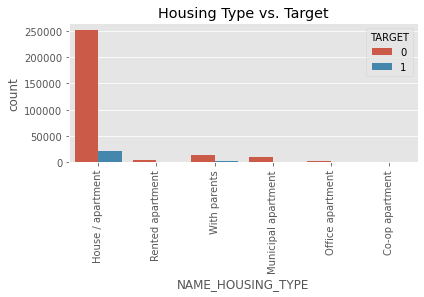

In [373]:
plt.figure()
sns.countplot(application_dataset["NAME_HOUSING_TYPE"], hue=application_dataset["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()

In [374]:
valuewise_defaulter_percentage(application_dataset, 'NAME_HOUSING_TYPE')

,Value,Percentage of Defaulter
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


<b>Comment:</b>

1. Most of the applicants lives in the House/Apartment.
2. Applicants who are living with their parents/ in rented apartment have a higher rate of default.

# Segment 3 :Social Circle Feature

In [491]:
start_index = application_dataset.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_index = application_dataset.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = application_dataset.iloc[:, start_index:end_index+1]

In [492]:
social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [377]:
social_circle_df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


<AxesSubplot:>

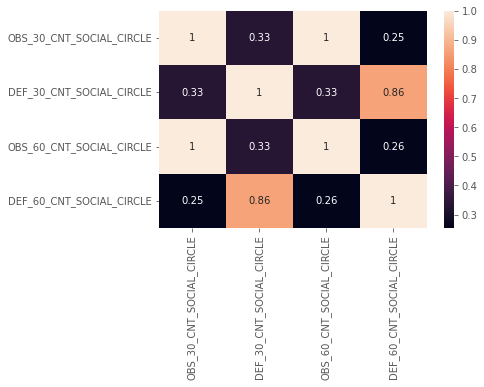

In [378]:
sns.heatmap(social_circle_df.corr(), annot=True)

<b>Comment:</b>

DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns

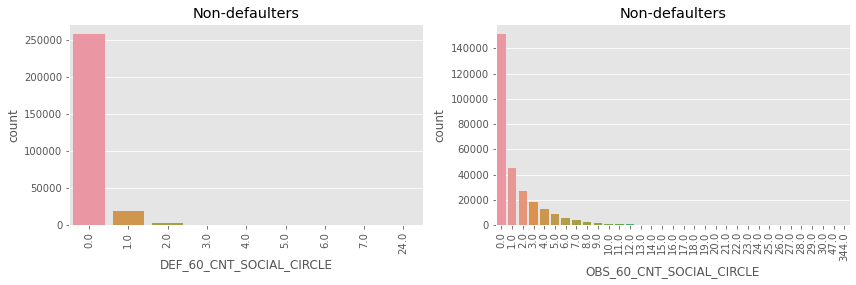

In [503]:
fig=plt.subplots(figsize=(12,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=non_default)
    plt.title("Non-defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

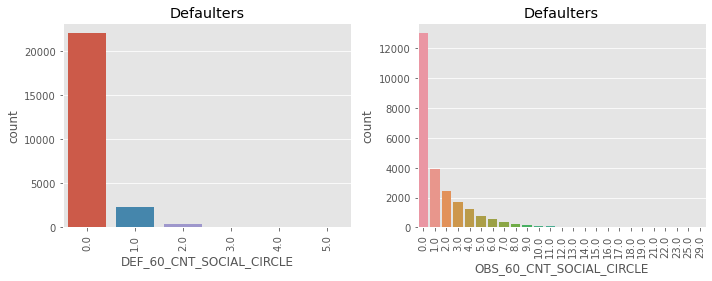

In [502]:
fig=plt.subplots(figsize=(10,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=default)
    plt.title("Defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

<b>Comment:</b>

For both defaulter and non-defaulter 'DEF_60_CNT_SOCIAL_CIRCLE' and 'OBS_60_CNT_SOCIAL_CIRCLE' features are displying similar trend.

# Segment 4 : Region Based Information Data

In [493]:
start_index = application_dataset.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_index = application_dataset.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_dataset.iloc[:, start_index:end_index+1]

In [494]:
region_df['REGION_RATING_CLIENT'] = application_dataset['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_dataset['REGION_RATING_CLIENT_W_CITY']

In [495]:
region_df["TARGET"] = application_dataset["TARGET"]


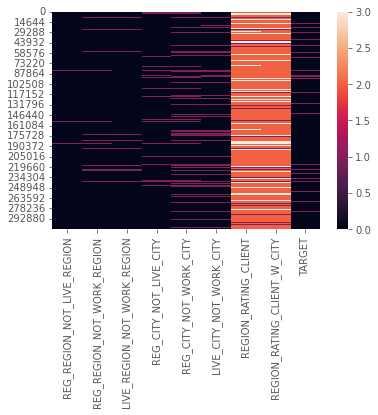

In [496]:
sns.heatmap(region_df)
plt.show()

<b>Assumption as per Observation:</b>

1. All the above features are labeled as '0' and '1'.
2. REG_REGION_NOT_LIVE_REGION mostly contains 0 so it can be removed.
3. REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION columns are identical, one can be removed.
4. REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY columns are identical, one can be removed.


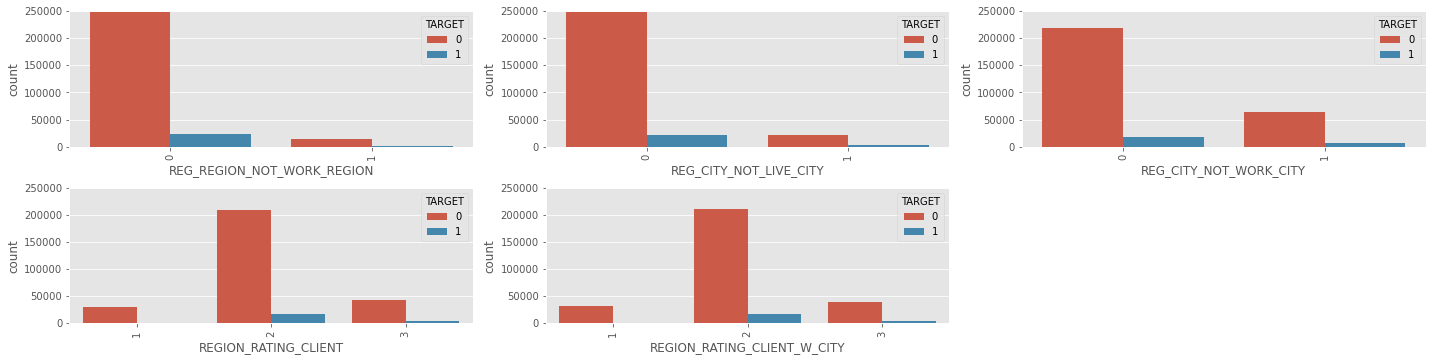

In [499]:
fig=plt.subplots(figsize=(20, 12))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_dataset[j], hue=application_dataset["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

<b>Comment:</b>

Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same
Highest Applicants have Region rating of 2

# Segment 5: Contact Related Details

In [508]:
applicant_contact_df = application_dataset[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]


In [509]:
applicant_contact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              307511 non-null  int64  
 1   FLAG_EMP_PHONE          307511 non-null  int64  
 2   FLAG_WORK_PHONE         307511 non-null  int64  
 3   FLAG_CONT_MOBILE        307511 non-null  int64  
 4   FLAG_PHONE              307511 non-null  int64  
 5   FLAG_EMAIL              307511 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
 7   TARGET                  307511 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 18.8 MB


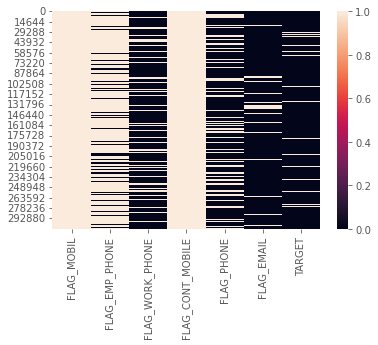

In [510]:
plt.figure()
sns.heatmap(applicant_contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))
plt.show()

<b>Assumption based on Observation:</b>

All the features of applicant_contact_df are categorical (between 0 and 1)

Theer is no similarity in patterns of TARGET value with other features, hence, we are assuming that the feature are not useful for our analysis.

Hence, removing all features.

# Segment 6: Asset Related Details

In [389]:
application_dataset[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307511 non-null  object 
 1   FLAG_OWN_REALTY  307511 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307511 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ MB


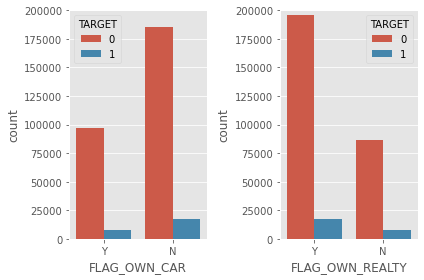

In [390]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(application_dataset['FLAG_OWN_CAR'], hue=application_dataset['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(application_dataset['FLAG_OWN_REALTY'], hue=application_dataset['TARGET'], order=['Y','N'], ax=ax2)

plt.tight_layout()

plt.show()

In [391]:
valuewise_defaulter_percentage(application_dataset, 'FLAG_OWN_CAR')

,Value,Percentage of Defaulter
0,N,8.500227
1,Y,7.24373


In [392]:
valuewise_defaulter_percentage(application_dataset, 'FLAG_OWN_REALTY')

,Value,Percentage of Defaulter
1,N,8.324929
0,Y,7.961577


<b>Comment:</b>

Majority of the applicants own realty.
Most of the applicants do not have a car/s.
Applicants not owning either a reality and car have a slightly higher default rate than the people who own reality and car

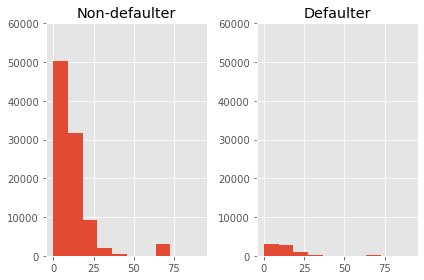

In [393]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,60000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,60000), title="Defaulter")

non_default['OWN_CAR_AGE'].hist(bins=10, ax=ax1)
default['OWN_CAR_AGE'].hist(bins=10, ax=ax2)

plt.tight_layout()

plt.show()

<b>Comment:</b>

Defaulter or not, between  age of 0-25 years own a car.
As we can see that for both the target value, trends are similar, thus the feature can dropped.

# Segment 7: Family Related Details

In [513]:
application_dataset[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [514]:
# dropp the rows(2) with null value in CNT_FAM_MEMBERS

application_dataset = application_dataset.dropna(subset=['CNT_FAM_MEMBERS']) 
application_dataset[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307509 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307509 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


In [515]:
# Converting to Integer: As the number of family members can not have fraction value. 

application_dataset['CNT_FAM_MEMBERS'] = application_dataset['CNT_FAM_MEMBERS'].astype(int)
application_dataset[['CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   CNT_FAM_MEMBERS  307509 non-null  int64
dtypes: int64(1)
memory usage: 4.7 MB


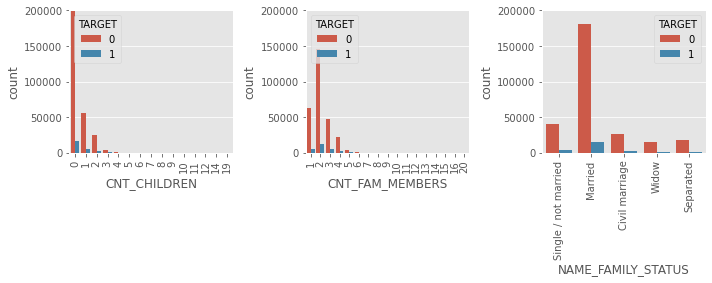

In [516]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']):
    plt.subplot(3, 3, i+1, ylim=(0, 200000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_dataset[j], hue=application_dataset["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [398]:
valuewise_defaulter_percentage(application_dataset, 'NAME_FAMILY_STATUS')

,Value,Percentage of Defaulter
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559868
3,Widow,5.824217


In [399]:
valuewise_defaulter_percentage(application_dataset, 'CNT_CHILDREN')

,Value,Percentage of Defaulter
9,9.0,100.0
10,11.0,100.0
7,6.0,28.571429
4,4.0,12.820513
3,3.0,9.631423
1,1.0,8.923575
2,2.0,8.721821
6,5.0,8.333333
0,0.0,7.711881
5,7.0,0.0


In [400]:
application_dataset.CNT_CHILDREN.value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [401]:
valuewise_defaulter_percentage(application_dataset, 'CNT_FAM_MEMBERS')

,Value,Percentage of Defaulter
16,11.0,100.0
10,13.0,100.0
9,10.0,33.333333
8,8.0,30.0
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.76029
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583498


In [402]:
application_dataset.CNT_FAM_MEMBERS.value_counts()

2     158357
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

# Segment 8: Education and Occupation Related Analyses

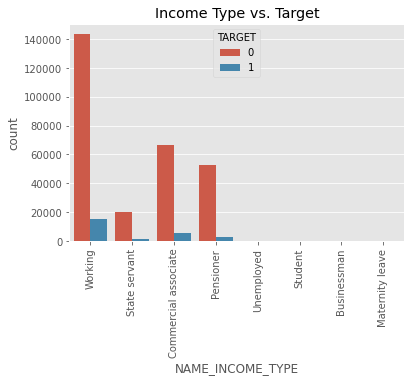

In [403]:
plt.figure()
sns.countplot(application_dataset['NAME_INCOME_TYPE'], hue=application_dataset["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Type vs. Target")
plt.show()

In [404]:
valuewise_defaulter_percentage(application_dataset,'NAME_INCOME_TYPE')

,Value,Percentage of Defaulter
7,Maternity leave,40.0
4,Unemployed,36.363636
0,Working,9.588472
2,Commercial associate,7.484466
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.0
6,Businessman,0.0


In [405]:
application_dataset.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<b>Comment:</b>

Most of the applicants are from working background.
Applicants  who are on Maternity Leave and are Unemployed has highest percentage of 'Defaulter'
Businessman have lowest ( alomost 0) percentage of Defaulter.

In [406]:
valuewise_defaulter_percentage(application_dataset,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,10.930537
0,Secondary / secondary special,8.939929
2,Incomplete higher,8.484966
1,Higher education,5.355187
4,Academic degree,1.829268


<b>Comment:</b>
Applicants with Lower secondary education level have high percentage of Defaulter.

In [407]:
application_dataset['OCCUPATION_TYPE'].isnull().value_counts()

False    211118
True      96391
Name: OCCUPATION_TYPE, dtype: int64

In [408]:
application_dataset['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [517]:
# Imputing  all the missing value for 'OCCUPATION TYPE' with 'Unknown'

application_dataset['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

In [410]:
valuewise_defaulter_percentage(application_dataset, 'OCCUPATION_TYPE')

,Value,Percentage of Defaulter
14,Low-skill Laborers,17.152413
5,Drivers,11.32613
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.57877
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


<b>Comment:</b>

'Low skilled labourers' have very high rate of defaulters when compared to other professions.

In [411]:
application_dataset['CODE_GENDER'].isnull().sum()

0

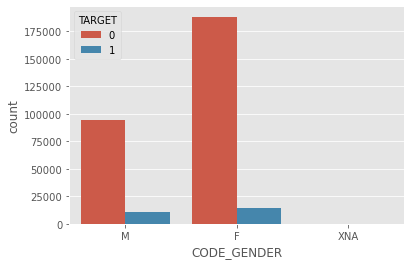

In [412]:
sns.countplot(application_dataset['CODE_GENDER'], hue=application_dataset["TARGET"])
plt.show()

<b>Comment:</b>

Female applicants are more than male applicants
Defaulter percentage is higher for male applicants

In [518]:
# Converting 'DAYS_BIRTH' to 'age'

application_dataset["Age"] = application_dataset.DAYS_BIRTH//(-365.25) 
application_dataset[["Age"]].describe()

,Age
count,307509.000000
mean,43.405198
std,11.945793
min,20.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,69.000000


In [519]:
# Dropping the column DAYS_BIRTH as new column age will be used for refined analysis

application_dataset.drop("DAYS_BIRTH", inplace=True, axis=1)


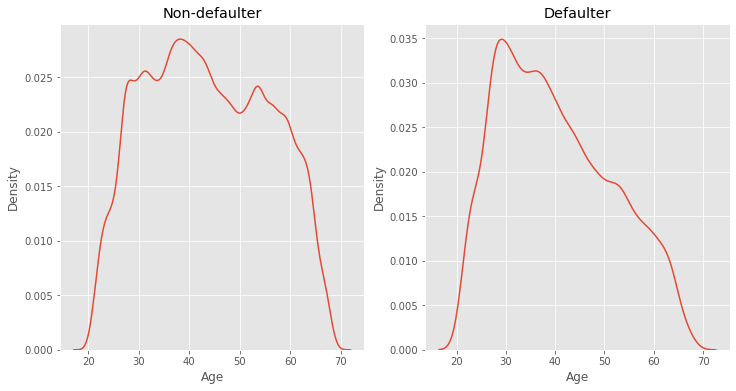

In [415]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_dataset[application_dataset["TARGET"] == 0]['Age'], ax=ax1)
sns.kdeplot(application_dataset[application_dataset["TARGET"] == 1]['Age'], ax=ax2)

plt.show()


<b>Observation:</b>

1. Applicant of age 30 have higher default rate.
2. Applicants more than 40 years are less Defaulters.

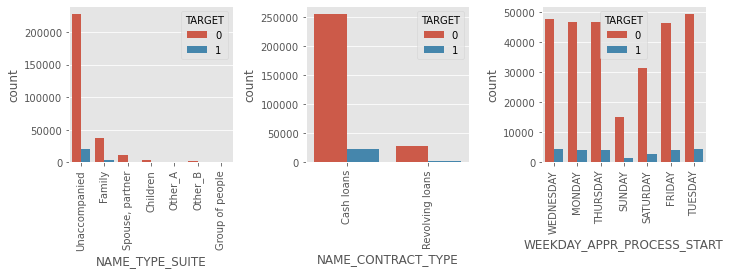

In [416]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_dataset[j], hue=application_dataset["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

<b>General observations:</b>

1. Most of the applicants are not accompanied when they are applying for loan.
2. Frequency of Cash loans in number is quite higher than the Revolving Loans.
3. All weekdays have similar number of applicants compared to weekend(Saturday and Sunday)

# Income and Annuity

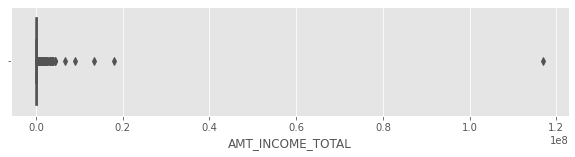

In [417]:
plt.figure(figsize=(10,2))
sns.boxplot(application_dataset['AMT_INCOME_TOTAL'])
plt.show()

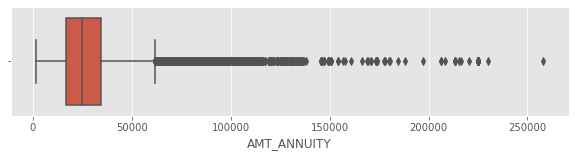

In [418]:
plt.figure(figsize=(10,2))
sns.boxplot(application_dataset['AMT_ANNUITY'])
plt.show()

In [520]:
# Boxplot here is showing the outliers for both income and annuity, there are some entries having very large annuity and income compared to others.
# If we consider this entries, it will mislead the average income of the entire population and create misleading insights for further analysis.
# Theerfore, we will exclude all values outside the 99 percentile for 'AMT_ANNUITY' and 'AMT_INCOMRE_TOTAL'

application_dataset = application_dataset[application_dataset['AMT_ANNUITY'] < np.nanpercentile(application_dataset['AMT_ANNUITY'], 99)]

In [521]:
application_dataset = application_dataset[application_dataset['AMT_INCOME_TOTAL'] < np.nanpercentile(application_dataset['AMT_INCOME_TOTAL'], 99)]

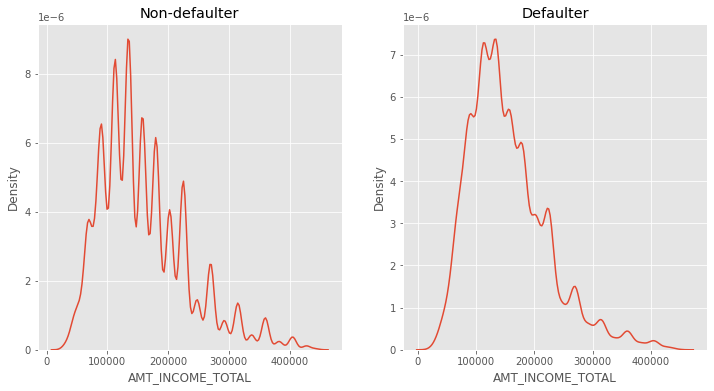

In [522]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_dataset[application_dataset["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax=ax1)
sns.kdeplot(application_dataset[application_dataset["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax=ax2)

plt.show()

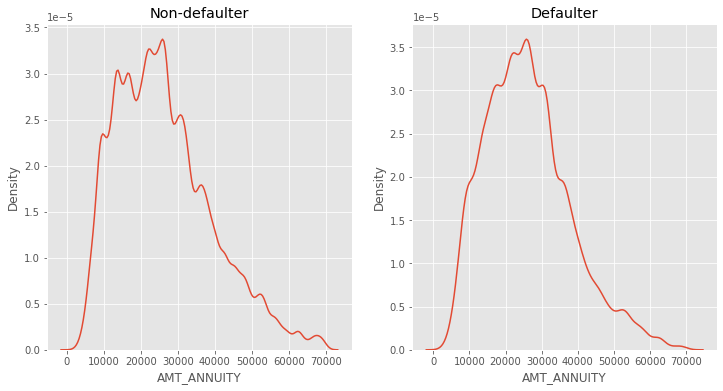

In [523]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_dataset[application_dataset["TARGET"] == 0]['AMT_ANNUITY'], ax=ax1)
sns.kdeplot(application_dataset[application_dataset["TARGET"] == 1]['AMT_ANNUITY'], ax=ax2)

plt.show()

<b>Comment:</b>

For both 'Defaulters' and 'non-defaulters' the  'AMT_ANNUITY' distribution is similar.

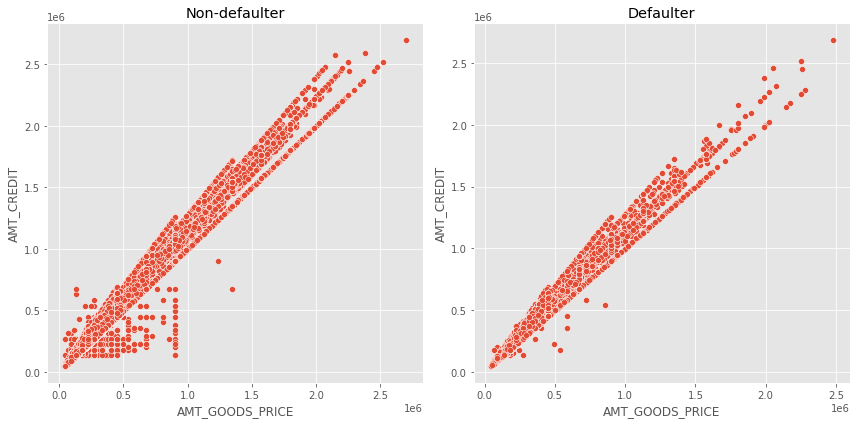

In [524]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(application_dataset[application_dataset["TARGET"] == 0]['AMT_GOODS_PRICE'], application_dataset[application_dataset["TARGET"] == 0]['AMT_CREDIT'], ax=ax1)
sns.scatterplot(application_dataset[application_dataset["TARGET"] == 1]['AMT_GOODS_PRICE'], application_dataset[application_dataset["TARGET"] == 1]['AMT_CREDIT'], ax=ax2)

plt.tight_layout()
plt.show()

<b>Comment:</b>

'AMT_CREDIT' and 'AMT_GOODS_PRICE' have a linear relation.
For lower ranges of 'AMT_CREDIT' and 'AMT_GOODS_PRICE', the amount of defaulters are less than that of the non-defaulters

In [424]:
application_dataset[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_1  130064 non-null  float64
 1   EXT_SOURCE_2  298814 non-null  float64
 2   EXT_SOURCE_3  240038 non-null  float64
dtypes: float64(3)
memory usage: 9.1 MB


In [425]:
application_dataset[['EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_3']].describe()

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_3
count,130064.000000,240038.000000,240038.000000
mean,0.499680,0.510843,0.510843
std,0.211062,0.194880,0.194880
min,0.014568,0.000527,0.000527
25%,0.331224,0.370650,0.370650
50%,0.502826,0.535276,0.535276
75%,0.672288,0.669057,0.669057
max,0.962693,0.896010,0.896010


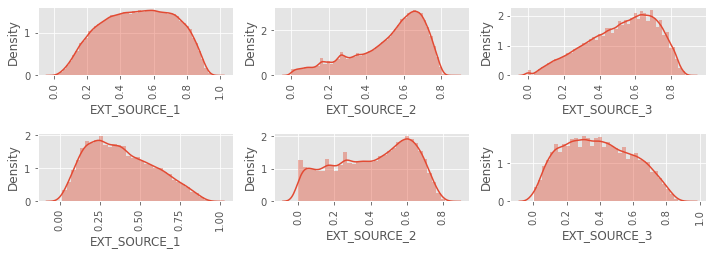

In [426]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    if i < 3:
        target=0 # first row for non-defaulters
    else:
        target=1 # second row for defaulters
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(application_dataset[application_dataset["TARGET"] == target][j])
    plt.xticks(rotation=90)
    plt.tight_layout()

<b>Comment:</b>

'EXT_SOURCE_1' and 'EXT_SOURCE_3' have a very vivid distribution for defaulters and non-defaulters.

# Top 10 correlation for Defaulters

In [427]:
defaulter_corr = default.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()

In [428]:
# Listing  all the correlations in pair, sorted in 'descending' order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998269
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.998250
COMMONAREA_MEDI           COMMONAREA_AVG              0.998107
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998100
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.998075
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997825
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.997668
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997187
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MEDI    0.997032
ENTRANCES_MEDI            ENTRANCES_AVG               0.996700
dtype: float64

# Top 10 Correlation for Non-defaulters

In [429]:
nondefaulter_corr = non_default.corr()
round(nondefaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack()

In [430]:
# Listing  all the correlations in pair, sorted in 'descending' order
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998522
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998508
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997202
FLOORSMAX_AVG             FLOORSMAX_MEDI              0.997018
ENTRANCES_AVG             ENTRANCES_MEDI              0.996899
ELEVATORS_AVG             ELEVATORS_MEDI              0.996161
COMMONAREA_AVG            COMMONAREA_MEDI             0.995857
LIVINGAREA_MEDI           LIVINGAREA_AVG              0.995568
APARTMENTS_AVG            APARTMENTS_MEDI             0.995163
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.994081
dtype: float64

# Now, Lets Analyse PREVIOUS APPLICATION Dataset

<b>Introduction</b>
In this notebook, we have mainly focused on analyzing previous_application.csv i.e. data about previous application of an applicant.

<b>Approach</b>
For the Exploratory data analysis, mentioned steps have been followed.

--> Import Modules

--> Read the dataset

--> Data Cleaning

Missing value handling
Type Casting
Fixing Rows and Columns - removing unncessary rows/columns (through missing value handling and correlation)
Handling Outliers
--> <b>Univariate Analysis</b>
--> <b>Bivariate and Multivariate Analysis</b>

# Reading the dataset

In [431]:
application_dataset = pd.read_csv("application_data.csv")
prev_appl_dataset = pd.read_csv("previous_application.csv")

Checking first 5 rows of both the dataframes

In [432]:
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [433]:
prev_appl_dataset.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Checking number of features and their datatype in both dataframe

In [434]:
application_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [435]:
prev_appl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [436]:
print(application_dataset.shape)

print(prev_appl_dataset.shape)

(307511, 122)
(1670214, 37)


<b>Comment:</b>

prev_appl_dataset contains 37 features and 1670214 rows
(Out of which 15 features are float64, 6 features are integer, 16 features are object datatype)

application_dataset contains 121 features, 1 target variable, and 307511 rows
(Out of which 65 features are float64, 41 features are integer, 16 features are object datatype)

In [437]:
# Additional columns and common columns in application_dataset and prev_appl_dataset
additional_feat = []
common_feat = []

for col in application_dataset.columns:
    if col not in prev_appl_dataset.columns:
        additional_feat.append(col)
    else:
        common_feat.append(col)
        application_dataset
print(len(additional_feat))
print(len(common_feat))
print(common_feat)

114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


<b>Comment:</b>

'SK_ID_CURR' is an unique identifier that will be used to merge the relevant columns of 2 dataframes.

# Data Cleaning

In [438]:
# Function_name : Lets call it missing_data_percentage
# Usage : Returns percentage of missing values for all the features in a given Data Frame
# Arguments : dataframe
# Returns : a dataframe containing all those categories that have a missing values and percentage of all missing values in those categories

def missing_data_percentage(df):
    missing_value = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing_value = missing_value.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing_value

In [439]:
missing_data_prev = missing_data_percentage(prev_appl_dataset)

In [440]:
missing_data_prev.sort_values('percentage', ascending=False)

,category,percentage
5,RATE_INTEREST_PRIMARY,99.643698
6,RATE_INTEREST_PRIVILEGED,99.643698
2,AMT_DOWN_PAYMENT,53.63648
4,RATE_DOWN_PAYMENT,53.63648
7,NAME_TYPE_SUITE,49.119754
10,DAYS_FIRST_DRAWING,40.298129
11,DAYS_FIRST_DUE,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,40.298129
13,DAYS_LAST_DUE,40.298129
14,DAYS_TERMINATION,40.298129


<b>Assumption based on Observation:</b> 
There are total 16 features in 'prev_app_df' that have missing values.

We are dropping the features ('RATE_INTEREST_PRIMARY' and 'RATE_INTEREST_PRIVILEGED') as we can see that 99% data is missing.

Dropping rows containing missing values for the features('AMT_CREDIT' and 'PRODUCT_COMBINATION') for very low % of missing data.

Dropping entries would not cause any impact on the analysis becuse the percentage of the missing value is very low (~2%).

In [441]:
prev_appl_dataset.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
prev_appl_dataset.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)

#Checking the remaining columns
prev_appl_dataset

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [527]:
# Extracting few numeric features from the previous application data

numeric_features = []
for col in prev_appl_dataset.columns:
    if prev_appl_dataset[col].dtype == float or prev_appl_dataset[col].dtype == int:
        numeric_features.append(col)
        
print(numeric_features)

['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [443]:
prev_num_df = pd.DataFrame()

for col in numeric_features:
    prev_num_df[col] = prev_appl_dataset[col]
    
prev_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1669867 non-null  int64  
 1   SK_ID_CURR                 1669867 non-null  int64  
 2   AMT_ANNUITY                1297978 non-null  float64
 3   AMT_APPLICATION            1669867 non-null  float64
 4   AMT_CREDIT                 1669867 non-null  float64
 5   AMT_DOWN_PAYMENT           774370 non-null   float64
 6   AMT_GOODS_PRICE            1284699 non-null  float64
 7   HOUR_APPR_PROCESS_START    1669867 non-null  int64  
 8   NFLAG_LAST_APPL_IN_DAY     1669867 non-null  int64  
 9   RATE_DOWN_PAYMENT          774370 non-null   float64
 10  DAYS_DECISION              1669867 non-null  int64  
 11  SELLERPLACE_AREA           1669867 non-null  int64  
 12  CNT_PAYMENT                1297983 non-null  float64
 13  DAYS_FIRST_D

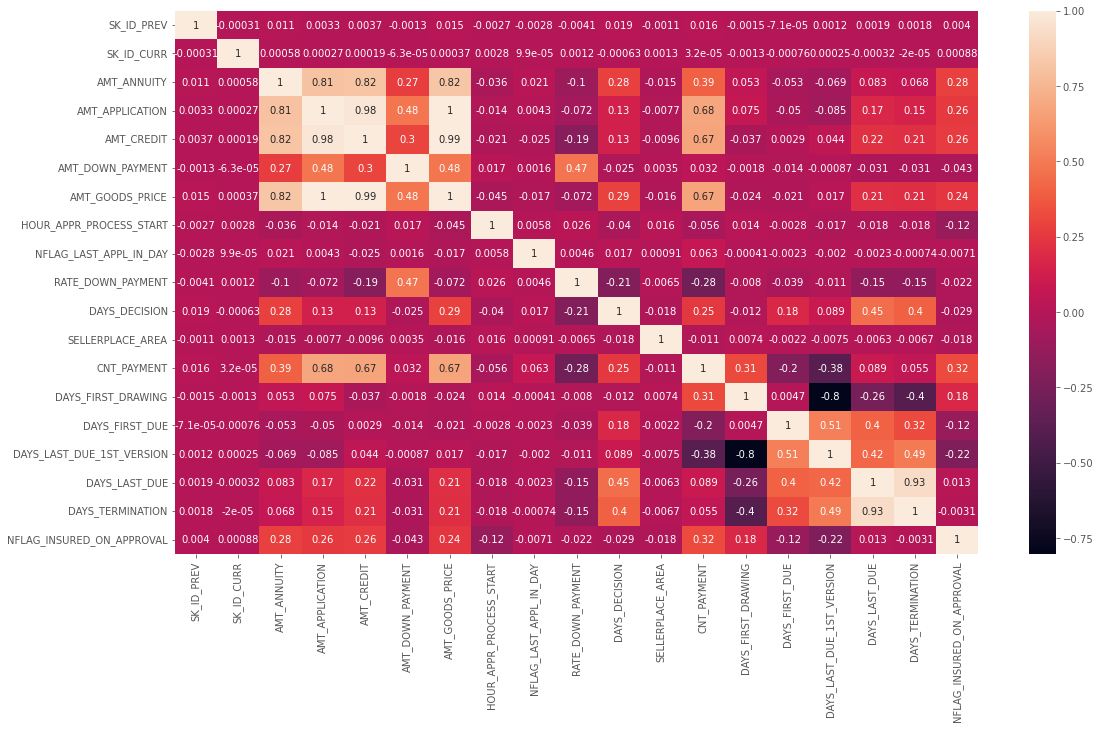

In [529]:
# Checking the correlation between the numeric features of the previous application data

plt.figure(figsize=(18,10))
sns.heatmap(prev_num_df.corr(), annot=True)
plt.show()

<b>Comment:</b>

'DAYS_LAST_DUE' and 'DAYS_TERMINATION' are highly correlated.
'DAYS_FIRST_DRAWING' and 'DAYS_LAST_DUE_1st_VERSION' have high (-)negative correlation.
'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' are highly correlated.
The features can be removed before modelling this data, as they would cause collinearity.
<b>'DAYS_TERMINATION','DAYS_LAST_DUE_1st_VERSION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' </b> For EDA purpose we are not removing them.

'SK_ID_PREV' column is not required for analysis.

In [445]:
prev_appl_dataset.drop(['SK_ID_PREV'], axis=1, inplace=True)

In [446]:
prev_appl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1669867 non-null  int64  
 1   NAME_CONTRACT_TYPE           1669867 non-null  object 
 2   AMT_ANNUITY                  1297978 non-null  float64
 3   AMT_APPLICATION              1669867 non-null  float64
 4   AMT_CREDIT                   1669867 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1669867 non-n

In [447]:
print(prev_appl_dataset['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


In [448]:
# Filling the missing value as 'Unaccompanied' as most common value

prev_appl_dataset['NAME_TYPE_SUITE'].fillna(prev_appl_dataset.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [449]:
# Merging only required columns of application_data with previous_application_data

prev_ap_merged = pd.merge(application_dataset[['SK_ID_CURR', 'TARGET']], prev_appl_dataset, how='left', on=['SK_ID_CURR'])

prev_ap_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429841 entries, 0 to 1429840
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1429841 non-null  int64  
 1   TARGET                       1429841 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413387 non-null  object 
 3   AMT_ANNUITY                  1106482 non-null  float64
 4   AMT_APPLICATION              1413387 non-null  float64
 5   AMT_CREDIT                   1413387 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413387 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413387 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413387 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413387 non-null  float64
 12  RATE_DOWN_PAYMENT            664161 non-nu

In [530]:
# Checking the numeric data in merge dataset

prev_ap_merged.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,628193.000000,628193.000000,628193.000000,6.281930e+05,6.281930e+05,628193.000000,6.281930e+05,628193.000000,628193.000000,628193.000000,628193.000000,6.281930e+05,628193.000000,551232.000000,551232.000000,551232.000000,551232.000000,551232.000000,551232.000000
mean,278443.750445,0.076149,10078.997301,9.409008e+04,9.392248e+04,5682.026729,9.409008e+04,12.919609,0.999640,0.080728,-1322.077280,6.331313e+02,11.533919,364782.626896,2770.080797,-437.924045,39417.560998,41126.777859,0.190203
std,102732.765549,0.265236,7288.483940,8.379893e+04,8.649386e+04,9111.201490,8.379893e+04,3.335792,0.018964,0.103295,842.700124,1.151029e+04,6.203131,12985.345740,38339.483852,13854.236411,114985.295896,117060.719222,0.392462
min,100002.000000,0.000000,579.780000,0.000000e+00,5.139000e+03,-0.900000,0.000000e+00,0.000000,0.000000,-0.000015,-2922.000000,-1.000000e+00,0.000000,-2785.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,189504.000000,0.000000,5126.625000,3.933000e+04,3.710250e+04,0.000000,3.933000e+04,11.000000,1.000000,0.000000,-2072.000000,3.000000e+01,6.000000,365243.000000,-1994.000000,-1687.000000,-1716.000000,-1690.000000,0.000000
50%,278728.000000,0.000000,8140.815000,7.105050e+04,6.945300e+04,2209.500000,7.105050e+04,13.000000,1.000000,0.089618,-1227.000000,8.000000e+01,10.000000,365243.000000,-1159.000000,-849.000000,-906.000000,-892.000000,0.000000
75%,367232.000000,0.000000,12783.105000,1.212300e+05,1.217475e+05,7884.000000,1.212300e+05,15.000000,1.000000,0.108916,-550.000000,4.980000e+02,12.000000,365243.000000,-514.000000,-191.000000,-280.000000,-271.000000,0.000000
max,456255.000000,1.000000,69342.075000,2.250000e+06,2.250000e+06,63747.000000,2.250000e+06,23.000000,1.000000,0.891062,-1.000000,4.000000e+06,72.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


<b>Comment: Not dropping the rest of columns with missing values, will use them for further analysis.</b>

# Handling Outliers

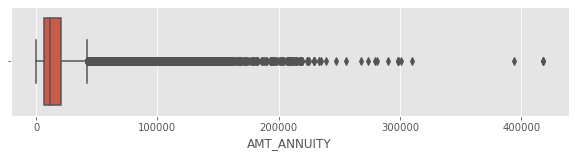

In [451]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

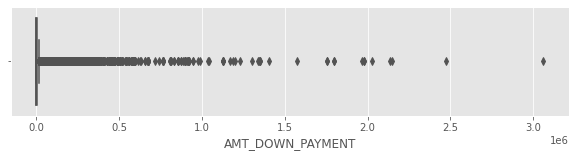

In [452]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

In [453]:
# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_DOWN_PAYMENT

prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_ANNUITY'] < np.nanpercentile(prev_ap_merged['AMT_ANNUITY'], 99)]
prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_DOWN_PAYMENT'] < np.nanpercentile(prev_ap_merged['AMT_DOWN_PAYMENT'], 99)]

Checking the features after updating.

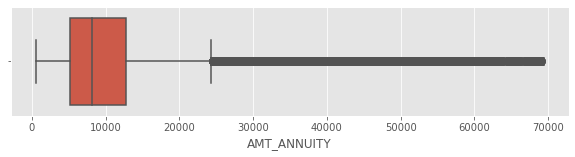

In [454]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

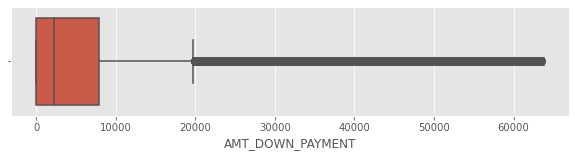

In [455]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

# Checking Data Imbalance in Previous Application Data

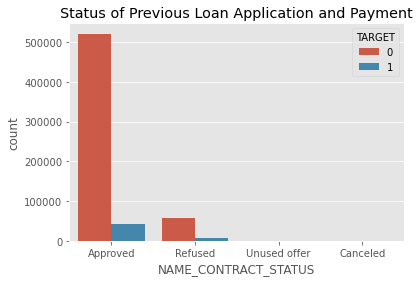

In [456]:
plt.style.use("ggplot")
plt.title("Status of Previous Loan Application and Payment")
sns.countplot(prev_ap_merged['NAME_CONTRACT_STATUS'], hue=prev_ap_merged['TARGET'])
plt.show()

In [457]:
# Percentage of previously approved loan applicants that defaulted in current loan

total_approved = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_approved = prev_ap_merged[(prev_ap_merged['TARGET'] == 1) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Percentage of previously approved loan applicants that defaulted in current loan : ", (default_approved*100/total_approved))

Percentage of previously approved loan applicants that defaulted in current loan :  7.354523610066182


In [458]:
# Percentage of previously refused loan applicants that were able to pay current loan

total_refused = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_refused = prev_ap_merged[(prev_ap_merged['TARGET'] == 0) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Percentage of previously refused loan applicants that were able to pay current loan : ", (nondefault_refused*100/total_refused))

Percentage of previously refused loan applicants that were able to pay current loan :  90.18283846699349


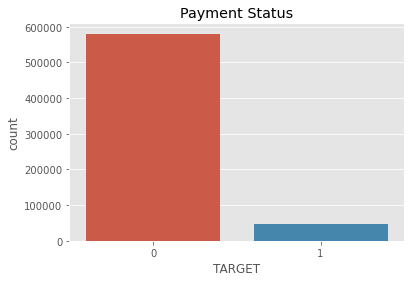

In [459]:
plt.title("Payment Status")
sns.countplot(prev_ap_merged['TARGET'])
plt.show()

<b>Comment:</b> This data is highly imbalanced as number of defaulter is very less in total population.

# Segment 4 and 5: Univariate, Bivariate and Multivariate Analysis

In [460]:
print(prev_ap_merged.FLAG_LAST_APPL_PER_CONTRACT.value_counts())
print(prev_ap_merged.NFLAG_LAST_APPL_IN_DAY.value_counts())

Y    628193
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
1.0    627967
0.0       226
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64


<b>Comment:</b>

'FLAG_LAST_APPL_PER_CONTRACT' can be dropped for having fixed value in all entries.

'NFLAG_LAST_APPL_IN_DAY' can be dropped for having highly imbalance data.

# Analysis of Numeric Features of Previous Application Data

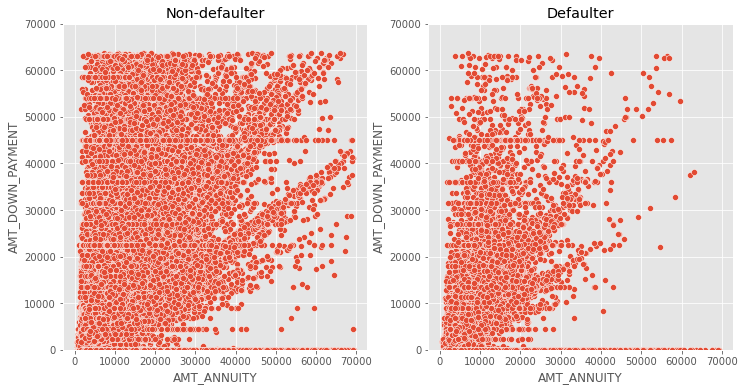

In [461]:
# Setting equal y-limit for both sub-plots for better comparison

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,70000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,70000), title="Defaulter")

sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_ANNUITY'], prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1)
sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_ANNUITY'], prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2)

plt.show()

<b>Comment:</b>

Number of defaulters are less for larger amount of annuity of previous application.
For higher down payment, defaulter cases are less.

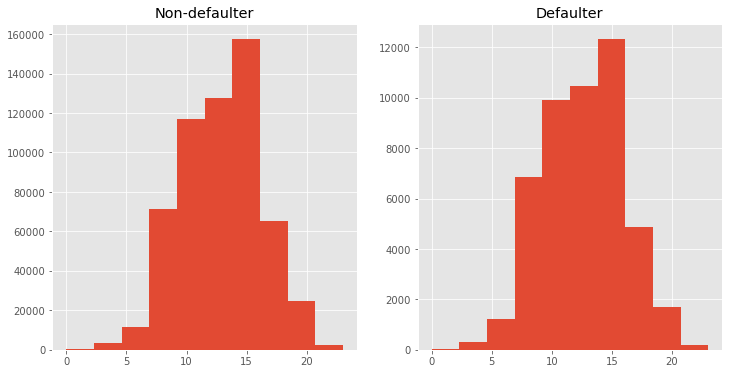

In [462]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

prev_ap_merged[prev_ap_merged["TARGET"] == 0]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax1)
prev_ap_merged[prev_ap_merged["TARGET"] == 1]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax2)

plt.show()

# <b>Comment:</b>

Most of the loans are applied around 15:00 hours. This feature is does not have visible impact on TARGET variable

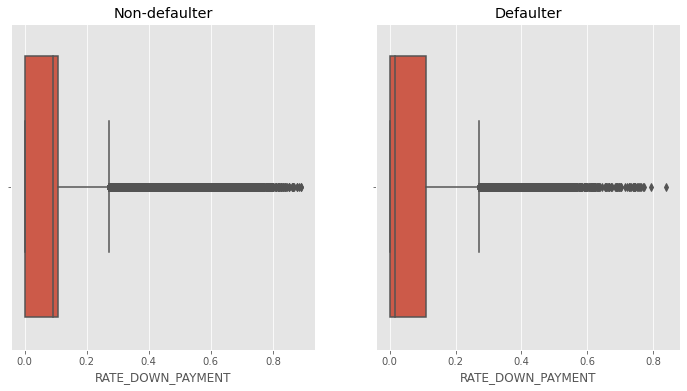

In [463]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.boxplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'], ax=ax1)
sns.boxplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'], ax=ax2)

plt.show()

Checking the quantile values for exact percentile

In [464]:
# Percentile of RATE_DOWN_PAYMENT for non-defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.091255
0.70    0.108909
0.90    0.211895
0.95    0.282832
0.99    0.498074
Name: RATE_DOWN_PAYMENT, dtype: float64

In [465]:
# Percentile of RATE_DOWN_PAYMENT for defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.017238
0.70    0.104260
0.90    0.199685
0.95    0.232643
0.99    0.454294
Name: RATE_DOWN_PAYMENT, dtype: float64

<b>Comment:</b>

For those who had lower rate of down payment in previous application, cases of default are higher.

# Analysis of Categorical Features of Previous Application Data

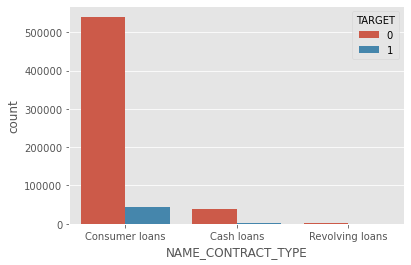

In [466]:
sns.countplot(prev_ap_merged.NAME_CONTRACT_TYPE, hue=prev_ap_merged.TARGET)
plt.show()

<b>Comment:</b>

Highest number of loans are applied for Consumer Loans

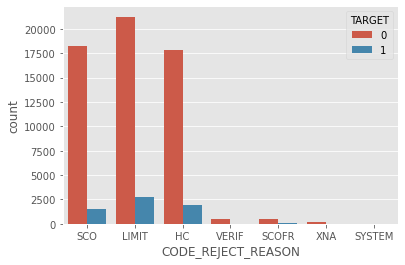

In [467]:
sns.countplot(prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"], hue=prev_ap_merged.TARGET)
plt.show()

<b>Comment:</b>

As seen in the above plot, 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection.

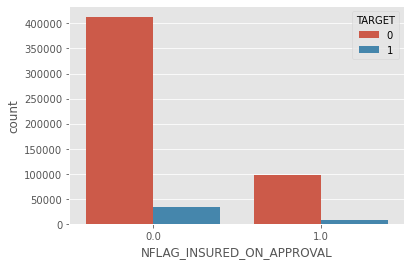

In [468]:
sns.countplot(prev_ap_merged['NFLAG_INSURED_ON_APPROVAL'], hue=prev_ap_merged['TARGET'])
plt.show()

<b>Comment:</b>

Most of the people did not request insurance during previous loan application.

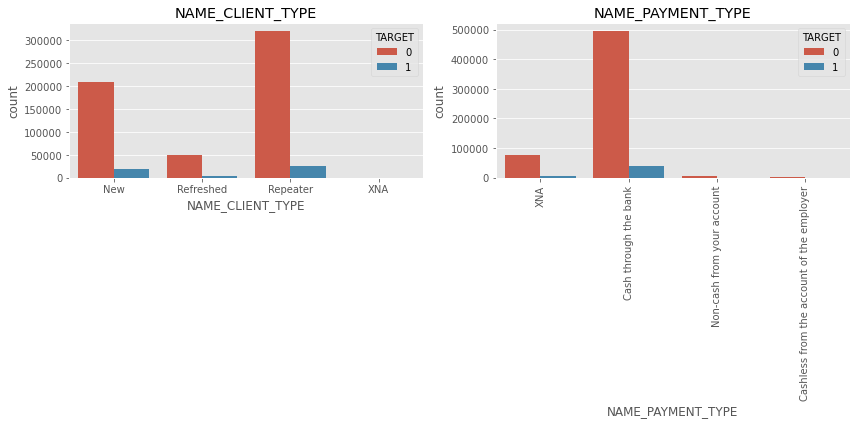

In [469]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="NAME_CLIENT_TYPE")
ax2 = fig.add_subplot(1, 2, 2, title="NAME_PAYMENT_TYPE")

sns.countplot(prev_ap_merged['NAME_CLIENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax1)
sns.countplot(prev_ap_merged['NAME_PAYMENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax2)
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

<b>Comment:</b>

Most of the applicants are repeater.
'Cash through the bank' is the most frequently used payment method

In [470]:
# This gives percentage of defaulter in total applicants having the same label of the category.
# For example: In 100 applicants, whose'NAME_GOODS_CATEGORY' is Insurance
# approx. 10 people have payment difficulty

def valuewise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [471]:
valuewise_defaulter_percentage(prev_ap_merged, 'NAME_GOODS_CATEGORY')

,Value,Percentage of Defaulter
23,Insurance,10.526316
0,Vehicles,10.25741
14,Jewelry,9.124951
17,Auto Accessories,9.029763
3,Mobile,8.615336
15,Office Appliances,8.307692
8,Computers,8.074335
20,Weapon,8.064516
21,Direct Sales,8.024691
5,Audio/Video,7.698706


<b>Comment:</b>

Highest percentage of default cases are for the applicants who previously applied for Insurance and Vehicles

In [472]:
valuewise_defaulter_percentage(prev_ap_merged, 'NAME_PORTFOLIO')

,Value,Percentage of Defaulter
2,Cards,17.119695
0,POS,7.666139
1,Cash,6.384448
3,Cars,0.0


<b>Comment:</b> For Cards defaulter rate is highest.

In [473]:
valuewise_defaulter_percentage(prev_ap_merged, 'NAME_PRODUCT_TYPE')

,Value,Percentage of Defaulter
1,walk-in,9.16555
0,XNA,7.665995
2,x-sell,6.03642


<b>Comment:</b>

From all the walk-in applicants 9% defaulted in current loan.

In [474]:
valuewise_defaulter_percentage(prev_ap_merged, 'CHANNEL_TYPE')

,Value,Percentage of Defaulter
4,AP+ (Cash loan),15.0
1,Country-wide,7.908171
2,Regional / Local,7.551291
0,Stone,7.294692
3,Credit and cash offices,6.124197
5,Contact center,4.545455
6,Car dealer,0.0


<b>Comment:</b>

15% loan applicatiant defaulted for AP+ (Cash Loan)

In [475]:
valuewise_defaulter_percentage(prev_ap_merged, 'NAME_SELLER_INDUSTRY')

,Value,Percentage of Defaulter
0,Auto technology,10.522088
9,Jewelry,9.019221
3,Connectivity,8.780637
2,Consumer electronics,7.451983
7,Industry,7.211664
4,Construction,6.597424
5,XNA,6.226598
1,Furniture,5.924492
6,Clothing,5.857399
8,Tourism,4.778157


<b>Comment:</b>

In seller Industry "Auto technology" has highest rate of defaulter
MLM partners has lowest number of defaulters

In [476]:
valuewise_defaulter_percentage(prev_ap_merged, 'NAME_YIELD_GROUP')

,Value,Percentage of Defaulter
4,XNA,17.119695
2,high,8.340935
1,middle,7.558098
0,low_normal,6.844973
3,low_action,6.608936


<b>Comment:</b>

Defaulter percentage is highest where NAME_YIELD_GROUP is not known.


In [477]:
valuewise_defaulter_percentage(prev_ap_merged, 'PRODUCT_COMBINATION')

,Value,Percentage of Defaulter
13,Card Street,17.195005
4,POS mobile with interest,8.761056
0,POS other with interest,7.953141
3,POS mobile without interest,7.888514
2,POS household with interest,7.752151
11,POS others without interest,7.256127
15,Card X-Sell,6.666667
5,POS household without interest,6.649376
9,Cash Street: middle,6.475391
10,Cash Street: high,6.417625


<b>Comment:</b> Highest percentage of default cases is for Card Street